EDA on Iris Datset

Aim-To differentiate between the Iris flower species based on the given features.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading dataset as a data frame of pandas library
df=pd.read_csv('C:\\Users\\Anoushka\\Anaconda3\\Iris.csv')

In [3]:
#To take a look at the first five rows of the dataset.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Extracting information about the dataset
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Checking if the dataset has null values.
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
#To get the main features of the dataset.
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64



The species are equally distributed in the dataset.


In [9]:
#To check if any duplicate rows are present in the dataset.
dup=df[df.duplicated()]
dup

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


No duplicate rows are present

Renaming columns

In [10]:
df.rename(columns={'SepalLengthCm':'Slength','SepalWidthCm':'Swidth','PetalLengthCm':'Plength','PetalWidthCm':'Pwidth'},inplace=True)

In [11]:
df

,Id,Slength,Swidth,Plength,Pwidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Finding correlation between different variables.


In [12]:
df.corr()


,Id,Slength,Swidth,Plength,Pwidth
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Slength,0.716676,1.000000,-0.109369,0.871754,0.817954
Swidth,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Plength,0.882747,0.871754,-0.420516,1.000000,0.962757
Pwidth,0.899759,0.817954,-0.356544,0.962757,1.000000


DATA VISUALIZATION

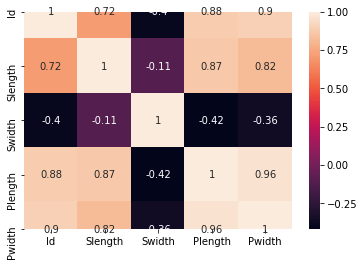

In [13]:
c=df.corr()
sns.heatmap(c,annot=True)

Heatmap displays the correlation between the different features.
Values closer to 1 illustrate a strong positive correlation whereas valuse closer to -1 show a strong negative correlation.

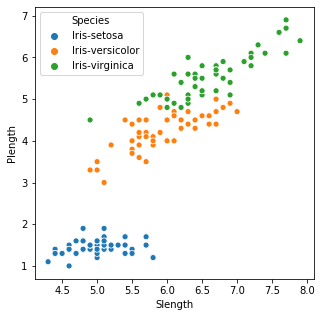

In [14]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Slength'],y=df['Plength'],hue=df['Species'])

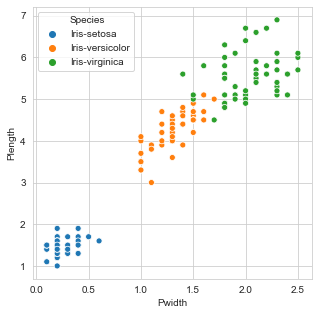

In [15]:


sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Pwidth'],y=df['Plength'],hue=df['Species'])

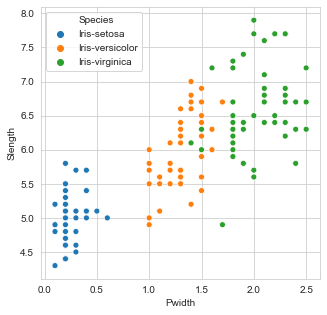

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['Pwidth'],y=df['Slength'],hue=df['Species'])

The two dimensional scatter plots depict the correlation between the two variables.

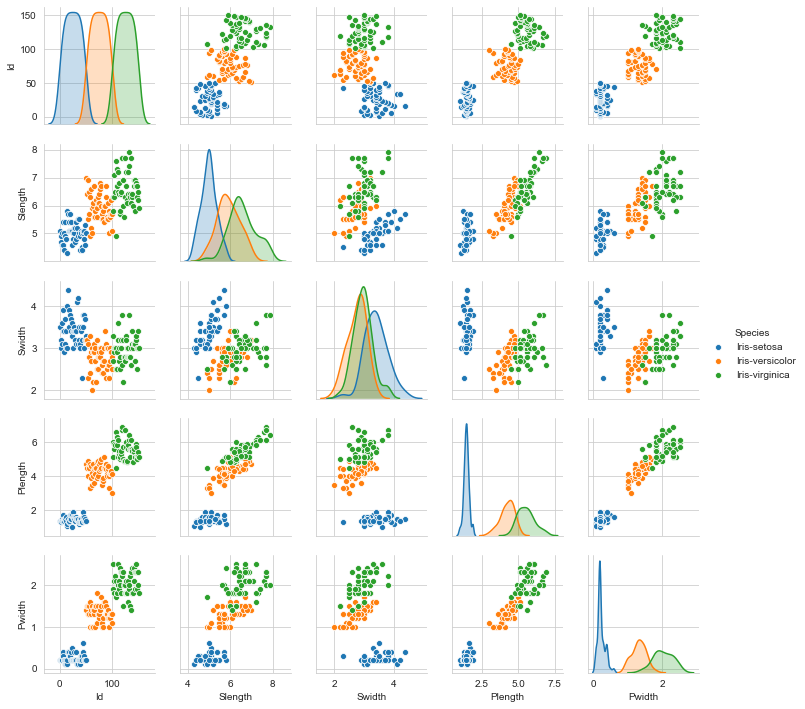

In [17]:

sns.pairplot(data=df,hue='Species',height=2)

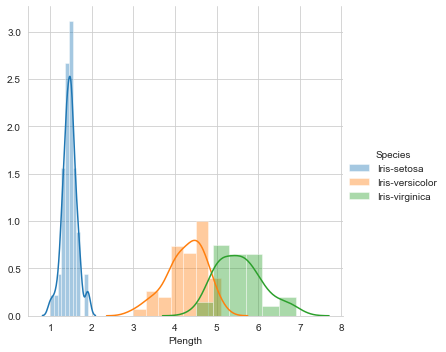

In [18]:

sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Plength").add_legend()
   


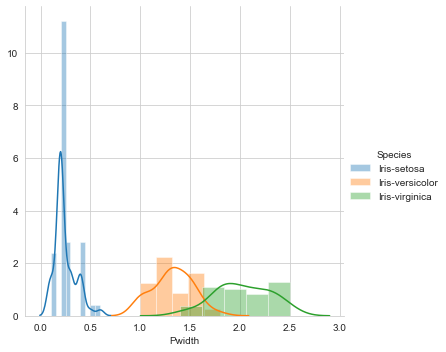

In [19]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"Pwidth").add_legend()

Histograms show the probability density function of the features Petal width and petal length with respect to the species.

From the plots  we can see that iris setosa can be separated from the other two species using Petal length and Petal width. 

Petal length is slightly better than petal width beacuse the distributions are better separated.

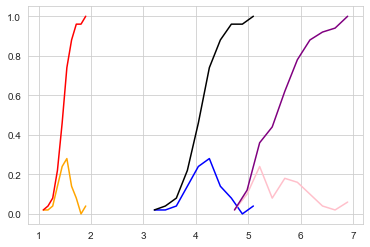

In [20]:
#Finding cumulative density function of feature petal length with respect to the species to see what percent of flowers fall in which species if we consider their petal lengths.
i_set=df[df['Species']=='Iris-setosa']
i_versi=df[df['Species']=='Iris-versicolor']
i_virg=df[df['Species']=='Iris-virginica']
count, bin_edge = np.histogram(i_set['Plength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='orange')
plt.plot(bin_edge[1:], cdf,color='red')

counts, bin_edge = np.histogram(i_versi['Plength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='blue')
plt.plot(bin_edge[1:], cdf,color='black')

count, bin_edge= np.histogram(i_virg['Plength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='pink')
plt.plot(bin_edge[1:], cdf,color='purple')





From the CDF it is clear that more than 95 percent of versicolor flowers have petal length less than or equal to 5. Hence we can somewhat distinguish the two species using this information.

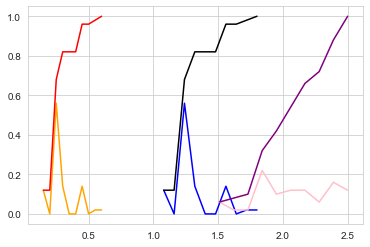

In [21]:
count, bin_edge = np.histogram(i_set['Pwidth'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='orange')
plt.plot(bin_edge[1:], cdf,color='red')

counts, bin_edge = np.histogram(i_versi['Pwidth'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='blue')
plt.plot(bin_edge[1:], cdf,color='black')

count, bin_edge= np.histogram(i_virg['Pwidth'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='pink')
plt.plot(bin_edge[1:], cdf,color='purple')



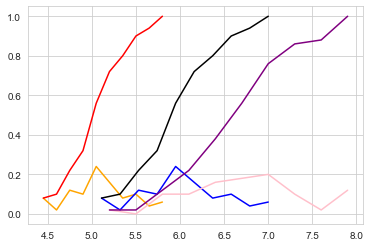

In [22]:
count, bin_edge = np.histogram(i_set['Slength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='orange')
plt.plot(bin_edge[1:], cdf,color='red')

counts, bin_edge = np.histogram(i_versi['Slength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='blue')
plt.plot(bin_edge[1:], cdf,color='black')

count, bin_edge= np.histogram(i_virg['Slength'], bins=10, density = True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:],pdf,color='pink')
plt.plot(bin_edge[1:], cdf,color='purple')


Cdf using petal width has some overlap  after the 1.5cm region,hence petal length is better.

Box plots represent  the median and quartiles of the data. 

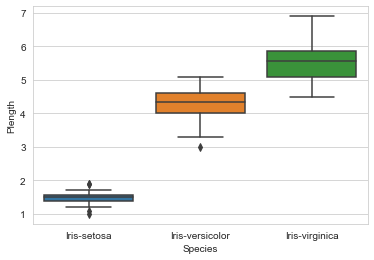

In [23]:
sns.boxplot(x="Species",y="Plength", data=df)

In [24]:

Q1 = np.percentile(df['Plength'],25) #Finding the first and third quartiles 

Q3 = np.percentile(df['Plength'],75) 
IQR = Q3 - Q1 #Inter quartile range
print(IQR)
part=df[((df['Plength']<Q1-1.5*IQR)|(df['Plength']>Q3+1.5*IQR))]
print(part)

3.4999999999999996
Empty DataFrame
Columns: [Id, Slength, Swidth, Plength, Pwidth, Species]
Index: []


The data frame returned is empty which means that there are no outliers in petal length feature.

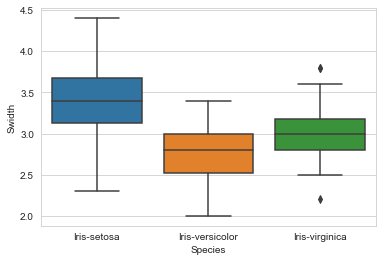

In [25]:
sns.boxplot(x="Species",y="Swidth", data=df)


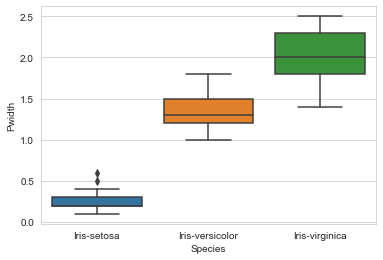

In [26]:
sns.boxplot(x="Species",y="Pwidth", data=df)

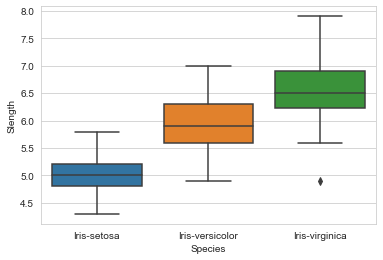

In [27]:
sns.boxplot(x="Species",y="Slength", data=df)

Species wise means and standard deviation of the features

In [28]:
df1=df.drop('Id',axis=1)
group=df1.groupby('Species').mean()
group

,Slength,Swidth,Plength,Pwidth
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Species wise means and standard deviation of the features

Petal length and petal width of iris setosa is lesser than the other two species

In [29]:
group=df1.groupby('Species').std()

In [30]:
group

,Slength,Swidth,Plength,Pwidth
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


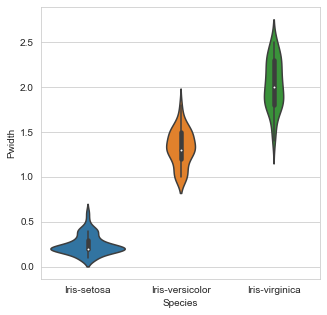

In [31]:

plt.figure(figsize=(5,5))
sns.violinplot(x="Species", y="Pwidth", data=df, height=10)
plt.show()

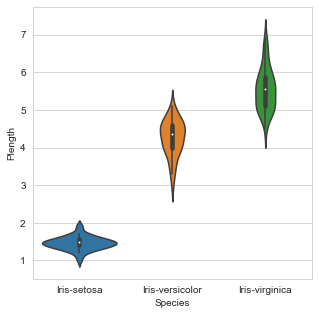

In [32]:
plt.figure(figsize=(5,5))
sns.violinplot(x="Species", y="Plength", data=df, height=10)
plt.show()

Violin plots that show the quartiles and pdf of species.

In [33]:
#Dropping the Id axis as it is not useful in classifying the flower.
df.drop('Id',axis=1,inplace=True)

In [34]:
types={'Iris-virginica':0,'Iris-setosa':1,'Iris-versicolor':2}
df['Species']=df['Species'].map(types)
df.head()

,Slength,Swidth,Plength,Pwidth,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


Converting flower species to numerical values.

Hypothesis Testing

 Hypothesis -Flowers with petal lengths more than 5cm are Iris Virginica and hence petal length can differentiate between the flowers species.If we convert petal length into a categorical variable such that flowers with petal length more than or equal to 5cm are labelled as above and those with less than 5 are labelled below, then these two variables will be highly correlated.
 
Null Hypothesis-Categorical petal length and species are  independent.

Alternate hypothesis- Categorical petal length and species variables are dependent.


In [35]:
#Converting petal length into a categorical variable 
#All values equal to or above 5 are above and all values below 5cm are coded as below.
Plen_cat=[]
for x in df['Plength']:
    if (x>=5):
        Plen_cat.append('above')
    else:
        Plen_cat.append('below')

df['Cat_plength']=Plen_cat
df.head()
        

,Slength,Swidth,Plength,Pwidth,Species,Cat_plength
0,5.1,3.5,1.4,0.2,1,below
1,4.9,3.0,1.4,0.2,1,below
2,4.7,3.2,1.3,0.2,1,below
3,4.6,3.1,1.5,0.2,1,below
4,5.0,3.6,1.4,0.2,1,below


In [36]:
cross = pd.crosstab(df['Cat_plength'], 
                            df['Species'],  
                               margins = False) 
print(cross) 


Species       0   1   2
Cat_plength            
above        44   0   2
below         6  50  48


In [37]:
import scipy.stats
scipy.stats.chi2_contingency(cross)

(116.1371237458194,
 6.041489242818361e-26,
 2,
 array([[15.33333333, 15.33333333, 15.33333333],
        [34.66666667, 34.66666667, 34.66666667]]))

The above function returns the following:


chi2 : float
    The test statistic.
    
p : float
    The p-value of the test
    
dof : int
    Degrees of freedom
    
expected : ndarray, same shape as `observed`
    The expected frequencies, based on the marginal sums of the table.
    
   Hence from the output it is visible that the p-value 6.041489242818361e-26 is much less than the confidence interval of 0.05 hence we can reject the null hypothesis.
   That is our alternate hypothesis is true.
   




Hypothesis-2

The mean of Petal width of  Iris setosa species is lesser ie different from the mean of the  entire sample Petal width.

Null hypothesis-Mean petal width of iris setosa flowers is nearly equal to that of the entire data set's petal width.

Alternate Hypothesis-Mean petal width of iris setosa flowers is considerably different from
that of the entire data set's petal width.


In [38]:
scipy.stats.ttest_1samp(a= df[df['Species'] == 'Iris-setosa']['Pwidth'],               
                 popmean= df['Pwidth'].mean())

C:\Users\Anoushka\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
C:\Users\Anoushka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Anoushka\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Anoushka\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Anoushka\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Anoushka\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars

Ttest_1sampResult(statistic=nan, pvalue=nan)

The small p value indicates that we can reject our null hypothesis, ie. petal width of Iris setosa flowers is different from the petal width mean.

In [39]:
df.drop(columns='Cat_plength',inplace=True)

Selecting the three best features which can be used to predict the species of the flower.

In [40]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:4]  
y = df.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variables','Score'] 
print(featureScores.nlargest(3,'Score'))  

  Variables       Score
2   Plength  116.169847
3    Pwidth   67.244828
0   Slength   10.817821


From the output of the code above we can see that Petal length and Petal width can be most useful to predict the species.

Using train test and split to split dataset into training and testing set and importing required libraries.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Using logistic regression algorithm ,building a model for predicting the species of the flowers

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(random_state=101)
logreg.fit(X_train, y_train)


C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#Predicting the species in the test dataset.
y_pred = logreg.predict(X_test)
acc1=logreg.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set',acc1)
#cm = confusion_matrix(y_test, y_pred)
#print(cm)
print(classification_report(y_test, y_pred))
predicted=cross_val_predict(logreg,X_train,y=y_train,cv=10)
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
train_sizes, train_scores, valid_scores = learning_curve(LogisticRegression(), X, y, train_sizes=[50, 80, 110], cv=5)
print(train_sizes)
print(train_scores)
print(valid_scores)
sns.lmplot(train)

Accuracy of logistic regression classifier on test set 0.9777777777777777
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[ 50  80 110]
[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.94545455 0.95454545 0.96363636 0.97272727 0.95454545]]
[[0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667]
 [1.         0.96666667 0.93333333 0.9        1.        ]]


C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarn

NameError: name 'train' is not defined

In [56]:
#Predicting the species in the test dataset.
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


Accuracy of the model is given as 98%

In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 19  0]
 [ 1  0 12]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      1.00      1.00        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [58]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 142)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 19  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\Anoushka\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:

print( accuracy_score(y_test, y_pred))

1.0


In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [61]:

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        19
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[12  0  1]
 [ 0 19  0]
 [ 0  0 13]]


In [62]:

print( accuracy_score(y_test, y_pred))

0.9777777777777777


In [63]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=19)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
   
print( accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[13  0  0]
 [ 0 19  0]
 [ 0  0 13]]


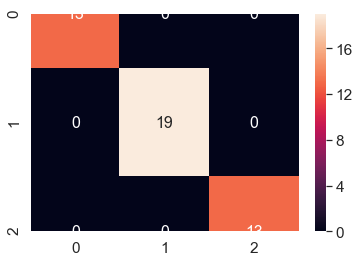

In [65]:


sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()